# About Dataset
Car Price Prediction Dataset Description:

This dataset contains 10,000 entries created for the purpose of predicting car prices. Each row represents information about a car and its price. The descriptions of the columns are as follows:

## Columns Descriptions:

* Brand: Specifies the brand of the car (e.g., Toyota, BMW, Ford).

* Model: Specifies the model of the car (e.g., Corolla, Focus, X5).

* Year: The production year of the car. Newer years typically indicate higher prices.

* Engine_Size: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.

* Fuel_Type: indicates the type of fuel used by the car:

    * Petrol: Cars running on gasoline.
    * Diesel: Cars running on diesel fuel.
    * Hybrid: Cars that use both fuel and electricity.
    * Electric: Fully electric cars.

* Transmission: The type of transmission in the car:

    * Manual: Manual transmission.
    * Automatic: Automatic transmission.
    * Semi-Automatic: Semi-automatic transmission.

* Mileage: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.

* Doors: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.

* Owner_Count: The number of previous owners of the car. Fewer owners generally indicate a higher price.

* Price:The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price_dataset.csv


# CAR PRICE DATA CLEANING & OUTLIER DETECTION

## Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/car-price-dataset/car_price_dataset.csv")


## Display Dataset Info 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Check Missing Values

In [5]:
missing_values = df.isnull().sum()
missing_values

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

## Descriptive Statistics

In [6]:
stats_summary = df.describe()
stats_summary

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


## Categorical Variables Overview

In [7]:
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
unique_values = {col: df[col].nunique() for col in categorical_columns}
for col, count in unique_values.items():
    print(f"{col}: {count} unique values")

Brand: 10 unique values
Model: 30 unique values
Fuel_Type: 4 unique values
Transmission: 3 unique values


## Outlier Analysis

### Create Boxplot for Outliers in 'Mileage' and 'Price'

### Boxplot for Mileage

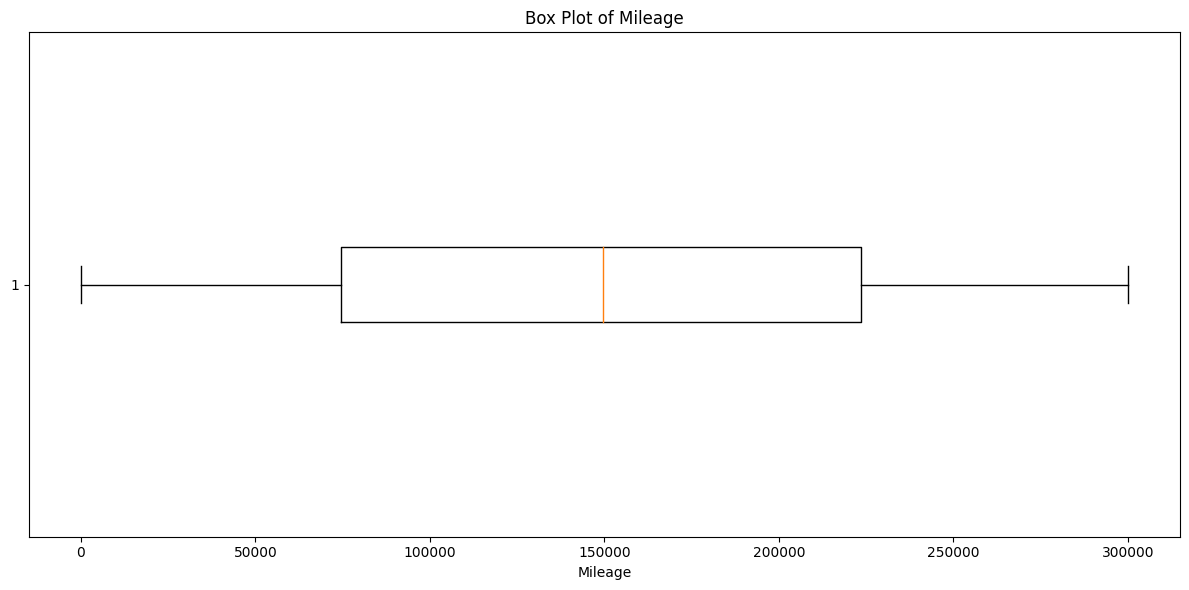

In [8]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Mileage'], vert=False)
plt.title("Box Plot of Mileage")
plt.xlabel("Mileage")
plt.tight_layout()
plt.show()

### Boxplot for Price

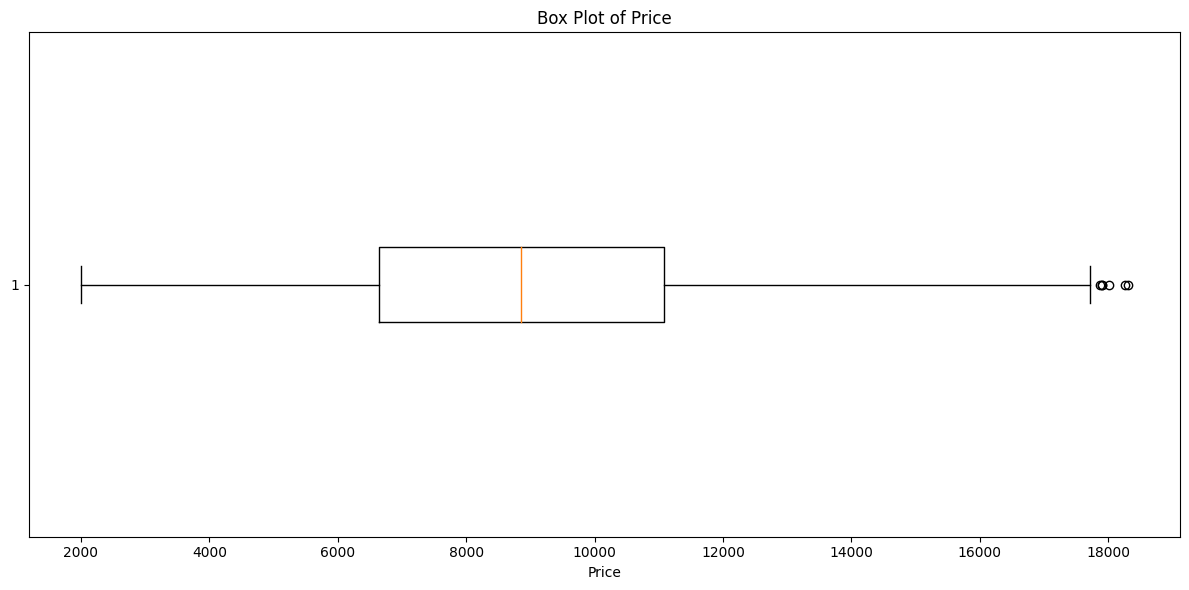

In [9]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Price'], vert=False)
plt.title("Box Plot of Price")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

In [10]:
Q1 = df[['Mileage', 'Price']].quantile(0.25)  # First quartile 
Q3 = df[['Mileage', 'Price']].quantile(0.75)  # Third quartile 
IQR = Q3 - Q1  # Interquartile Range 


### Define lower and upper bounds

In [11]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### Count outliers 

In [12]:
outliers = ((df[['Mileage', 'Price']] < lower_bound) | (df[['Mileage', 'Price']] > upper_bound)).sum()
outliers


Mileage    0
Price      6
dtype: int64

### Remove Outliers

In [13]:
df_cleaned = df[(df['Price'] >= lower_bound['Price']) & (df['Price'] <= upper_bound['Price'])]

### Show new dataset size

In [14]:
df_cleaned.shape

(9994, 10)

# CAR PRICE DATA VISUALIZATION 

### Set Seaborn style

In [15]:
sns.set_style("whitegrid")

## 1. Histogram - Distribution of Car Prices

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


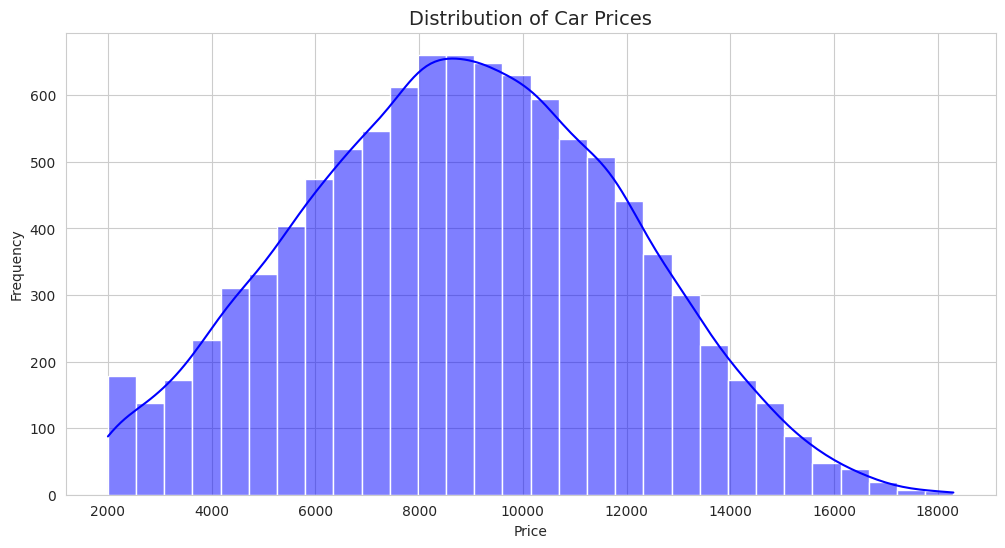

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True, color="blue")
plt.title("Distribution of Car Prices", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## 2. Histogram - Distribution of Car Mileage

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


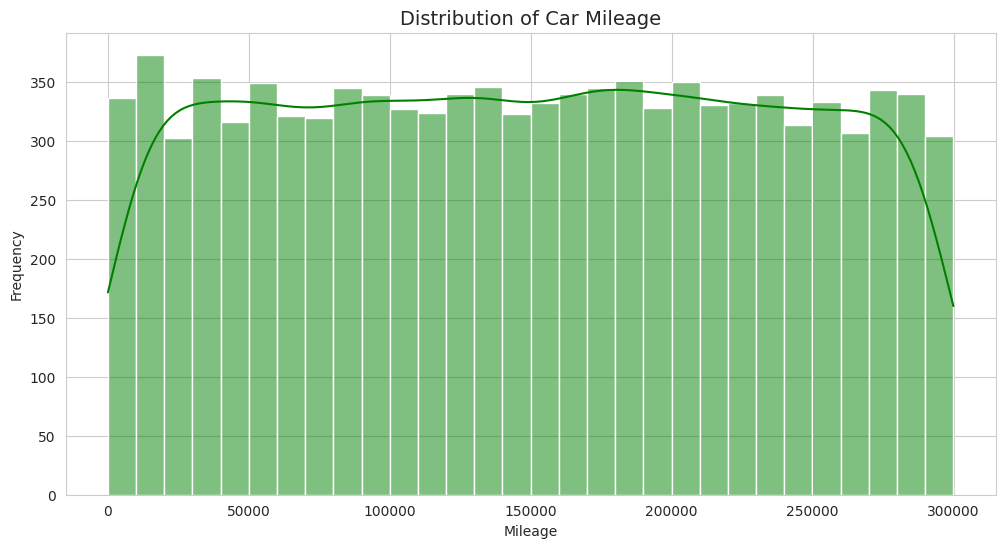

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Mileage'], bins=30, kde=True, color="green")
plt.title("Distribution of Car Mileage", fontsize=14)
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()

## 3. Correlation Heatmap - Relationships between numeric features

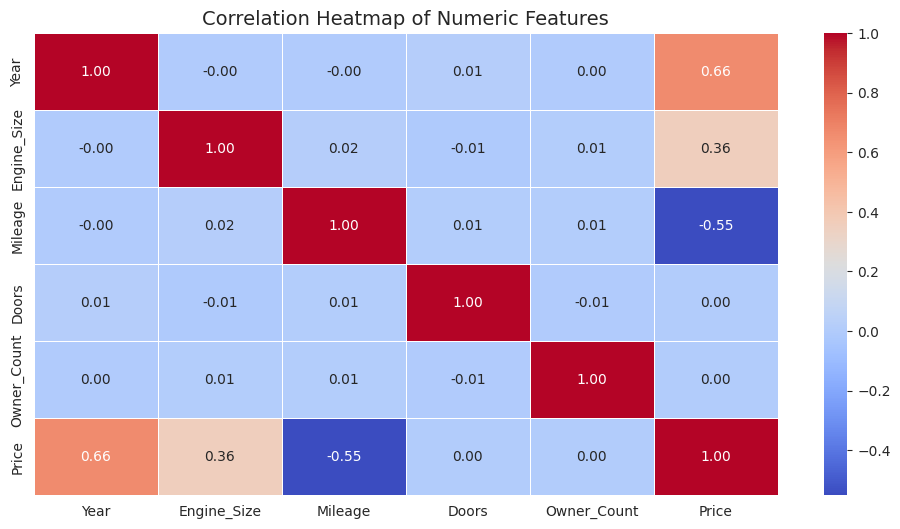

In [18]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


## 4. Scatter Plot - Price vs Mileage

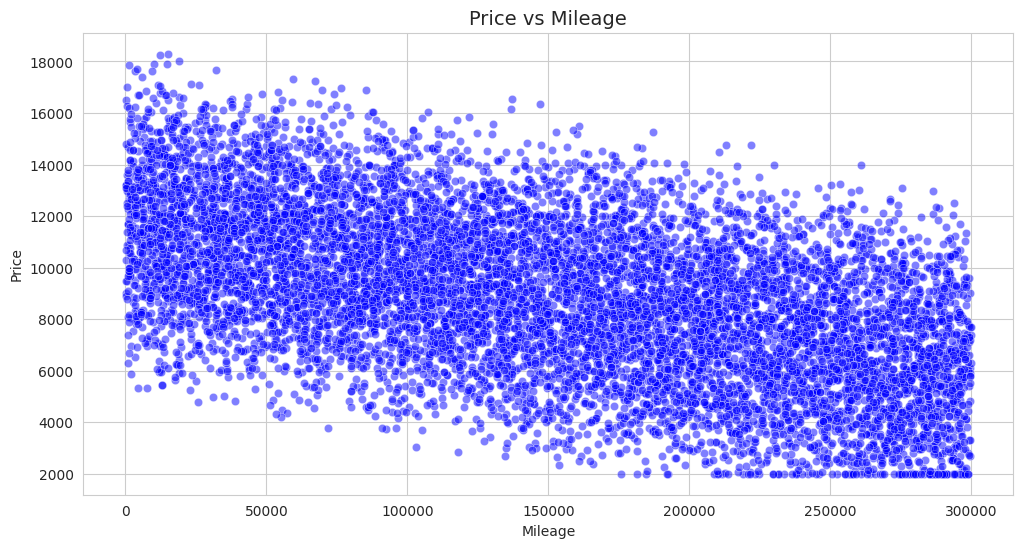

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Mileage'], y=df['Price'], alpha=0.5, color="blue")
plt.title("Price vs Mileage", fontsize=14)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

## 5. Scatter Plot - Engine Size vs Price

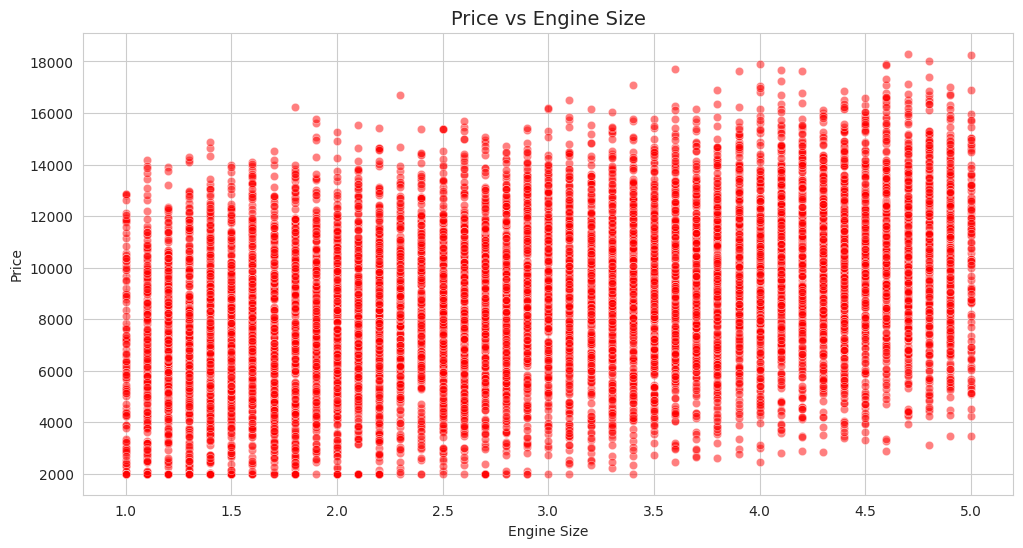

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Engine_Size'], y=df['Price'], alpha=0.5, color="red")
plt.title("Price vs Engine Size", fontsize=14)
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()


## 6. Pie Chart - Fuel Type Distribution

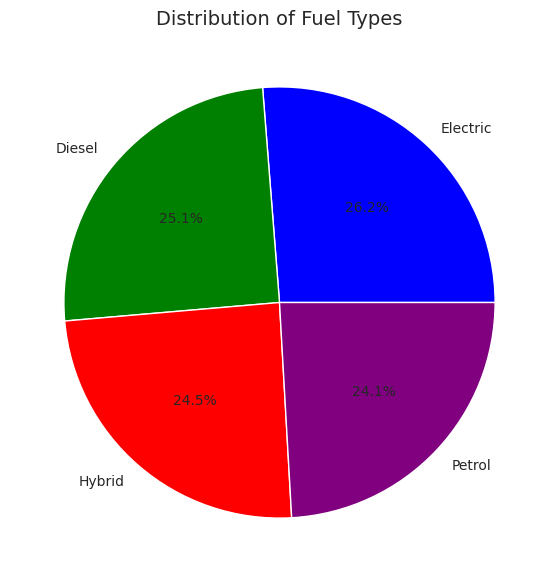

In [21]:
plt.figure(figsize=(7, 7))
fuel_counts = df['Fuel_Type'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', colors=["blue", "green", "red", "purple"])
plt.title("Distribution of Fuel Types", fontsize=14)
plt.show()

## 7. Pie Chart - Transmission Type Distribution

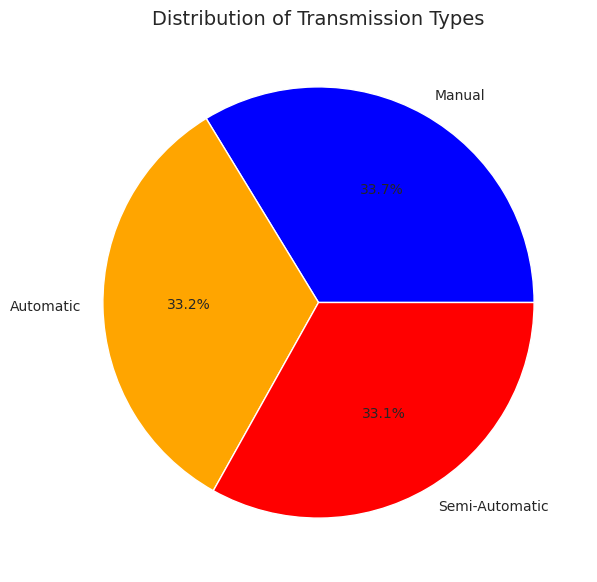

In [22]:
plt.figure(figsize=(7, 7))
transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=["blue", "orange", "red"])
plt.title("Distribution of Transmission Types", fontsize=14)
plt.show()


## 8. Bar Plot - Average Price by Brand

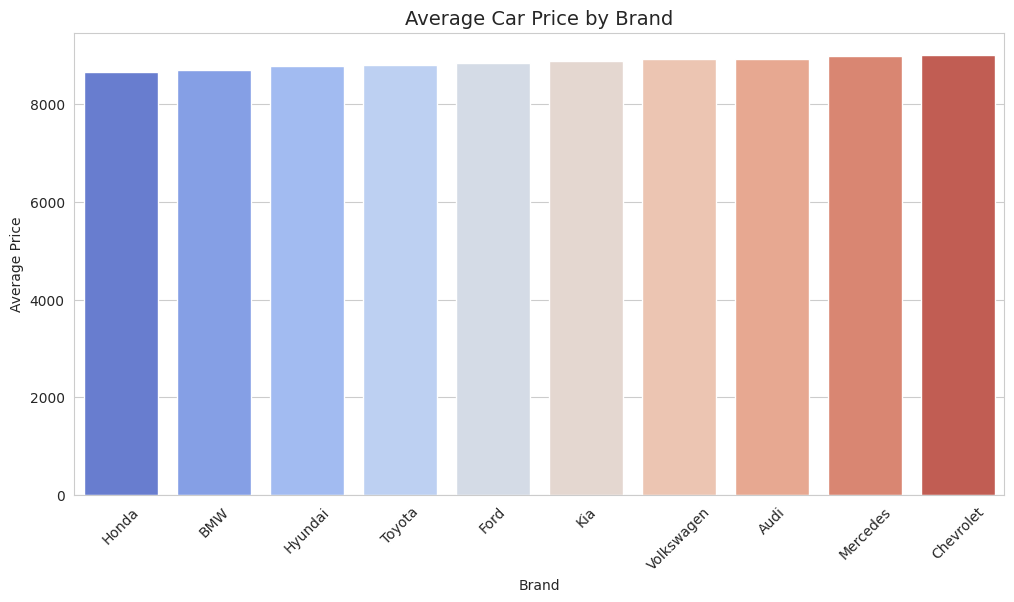

In [23]:
plt.figure(figsize=(12, 6))
brand_avg_price = df.groupby("Brand")["Price"].mean().sort_values()
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Car Price by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()

## 9. Bar Plot - Average Mileage by Brand

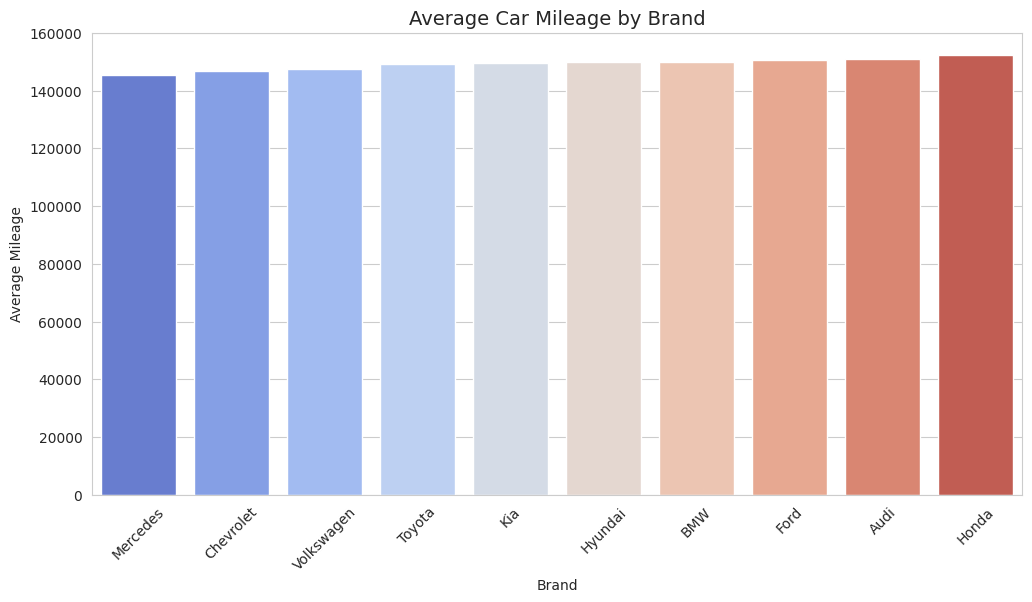

In [24]:
plt.figure(figsize=(12, 6))
brand_avg_mileage = df.groupby("Brand")["Mileage"].mean().sort_values()
sns.barplot(x=brand_avg_mileage.index, y=brand_avg_mileage.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Car Mileage by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Average Mileage")
plt.show()

## 10. Count Plot - Number of Cars by Fuel Type

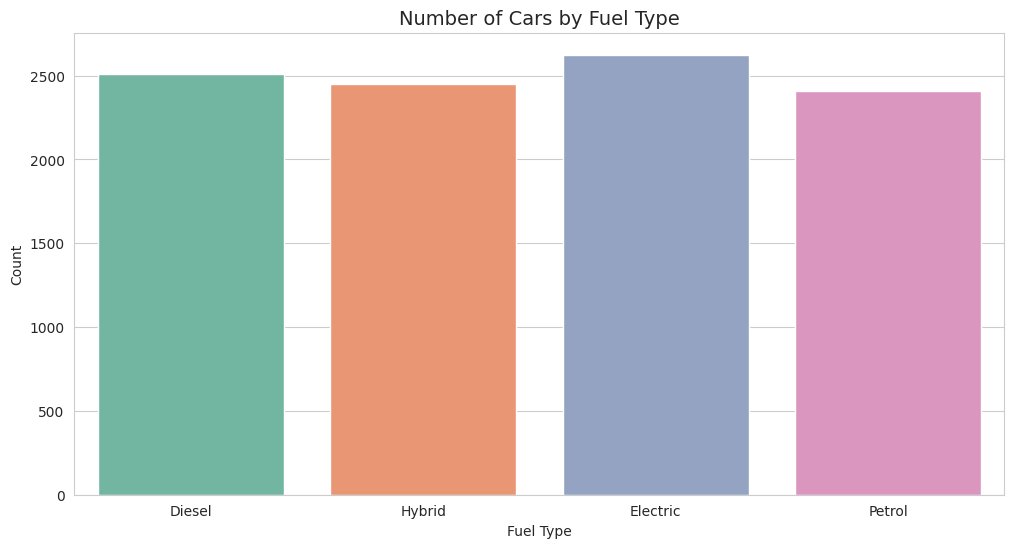

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Fuel_Type'], palette="Set2")
plt.title("Number of Cars by Fuel Type", fontsize=14)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

## 11. Count Plot - Number of Cars by Transmission Type

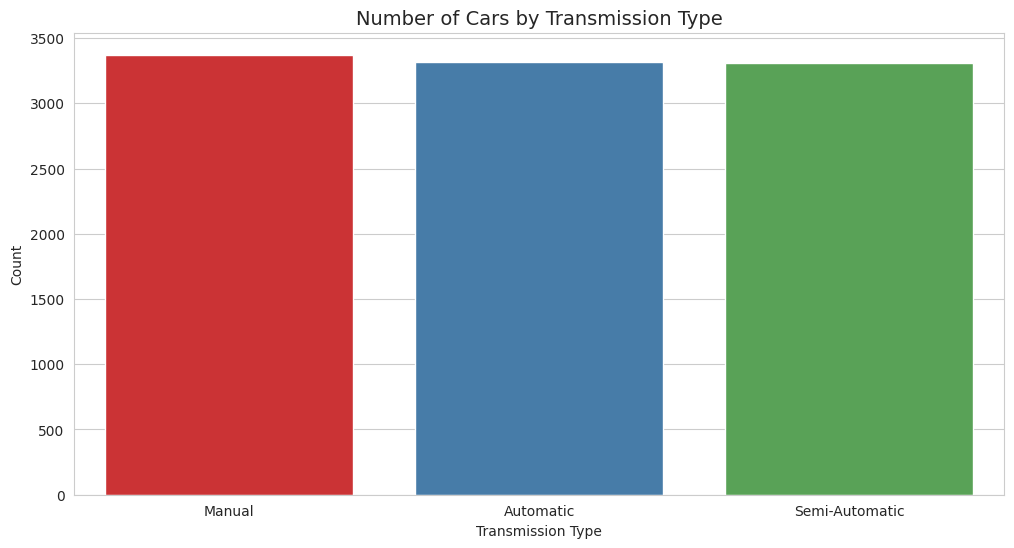

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Transmission'], palette="Set1")
plt.title("Number of Cars by Transmission Type", fontsize=14)
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()


## 12. Pair Plot - Relationship between variables

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

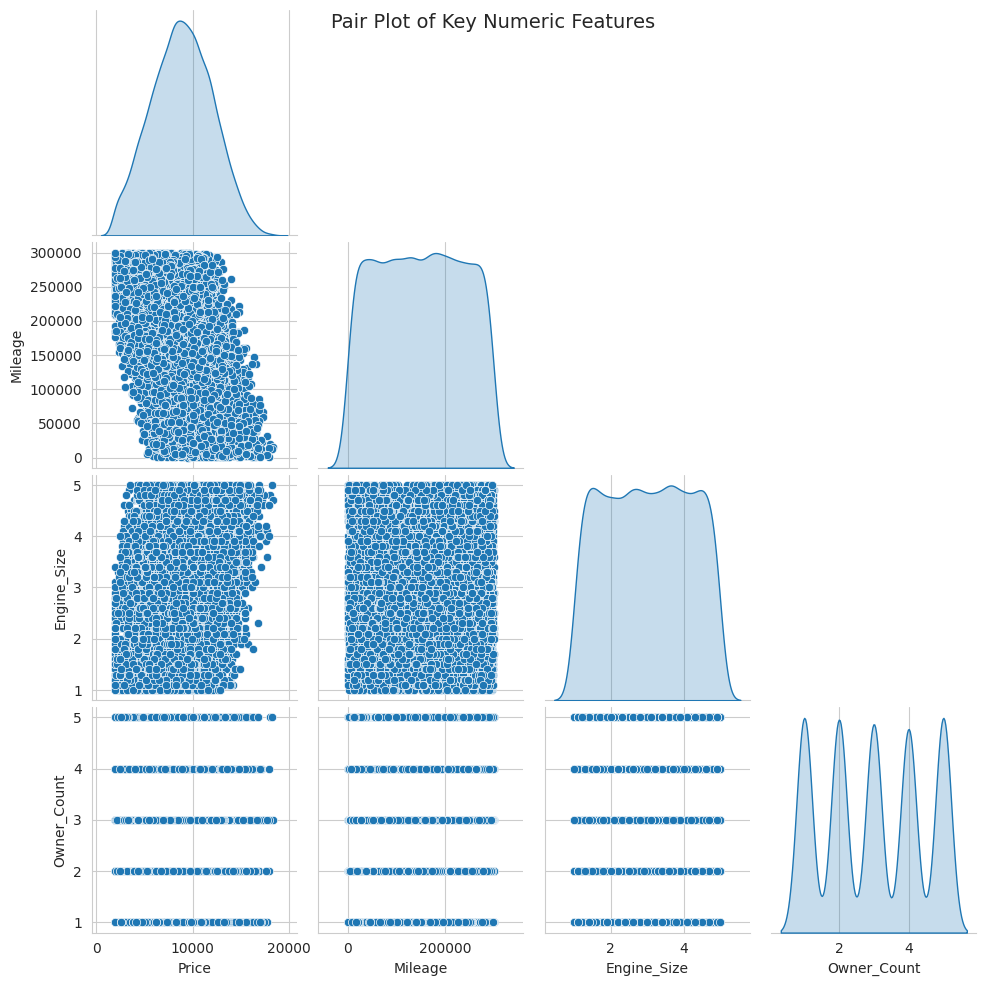

In [27]:
sns.pairplot(df, vars=["Price", "Mileage", "Engine_Size", "Owner_Count"], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Key Numeric Features", fontsize=14)
plt.show()

## 13. Violin Plot - Price Distribution by Fuel Type

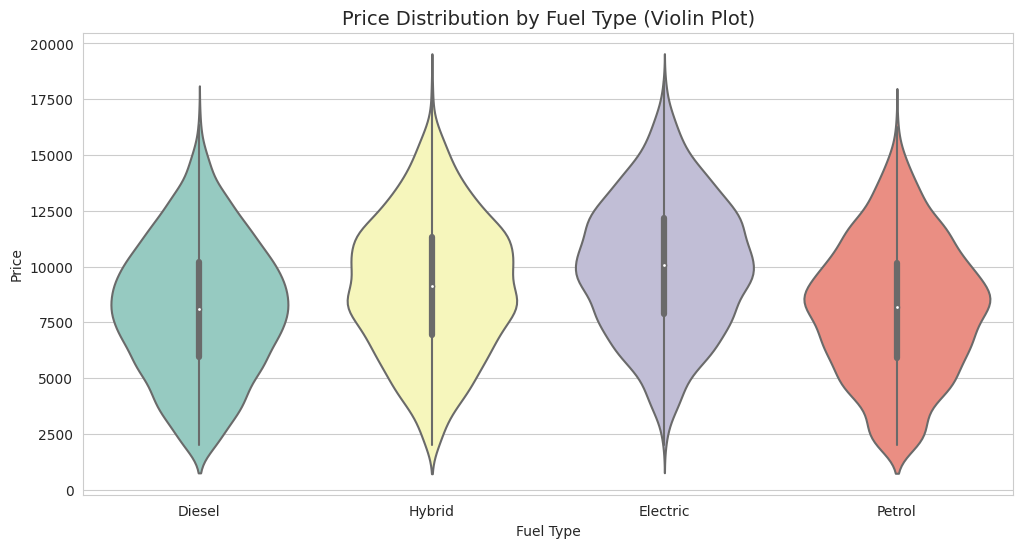

In [28]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Fuel_Type'], y=df['Price'], palette="Set3")
plt.title("Price Distribution by Fuel Type (Violin Plot)", fontsize=14)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

## 14. Swarm Plot (Improved with Strip Plot) - Price vs Owner Count

<ipython-input-29-5b6713579c82>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=df['Owner_Count'], y=df['Price'], jitter=True, palette="Set2", alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

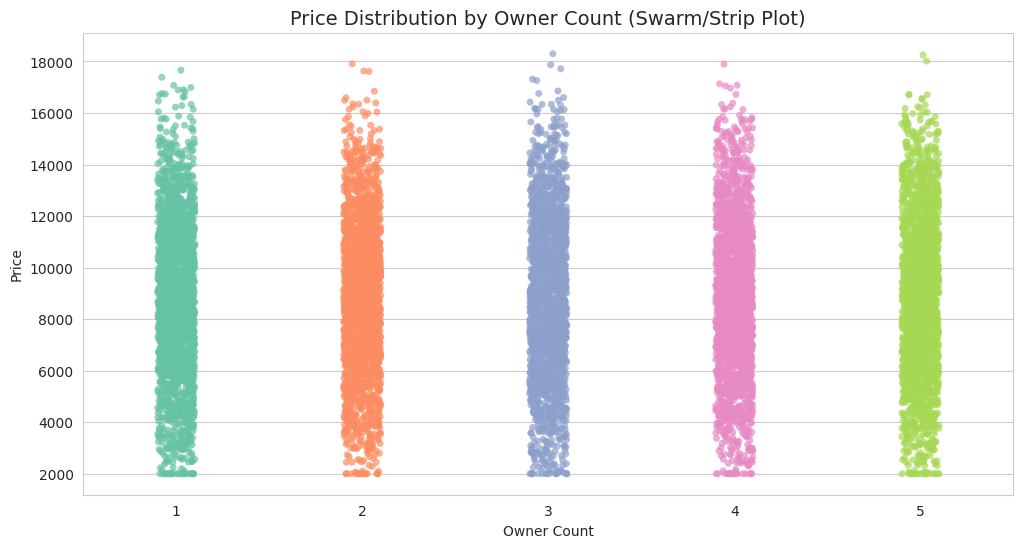

In [29]:
plt.figure(figsize=(12, 6))
sns.stripplot(x=df['Owner_Count'], y=df['Price'], jitter=True, palette="Set2", alpha=0.7)
plt.title("Price Distribution by Owner Count (Swarm/Strip Plot)", fontsize=14)
plt.xlabel("Owner Count")
plt.ylabel("Price")
plt.show()

## 15. 3D Scatter Plot - Price, Mileage & Engine Size

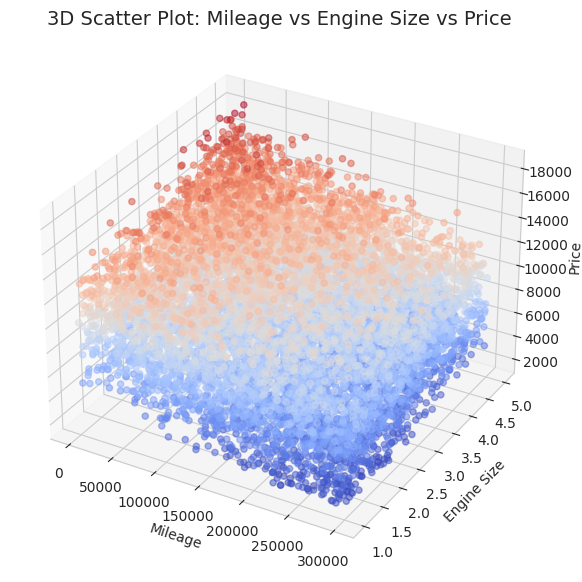

In [30]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Mileage'], df['Engine_Size'], df['Price'], alpha=0.5, c=df['Price'], cmap='coolwarm')
ax.set_xlabel("Mileage")
ax.set_ylabel("Engine Size")
ax.set_zlabel("Price")
ax.set_title("3D Scatter Plot: Mileage vs Engine Size vs Price", fontsize=14)
plt.show()

# CAR PRICE DATA MACHINE LEARNING MODELS

## Importing Libraries

In [31]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, RANSACRegressor, ARDRegression, TweedieRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Prepare dataset for regression models

In [32]:
df_regression = df.drop(columns=['Brand', 'Model', 'Fuel_Type', 'Transmission'])

## Split dataset into features (X) and target variable (y)

In [33]:
X = df_regression.drop(columns=['Price'])
y = df_regression['Price']

## Standardize features

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=537)


## Convert NumPy arrays to Pandas DataFrame/Series for missing value check

In [36]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.Series(y_test)

## Check and clean missing values in test set

In [37]:
if X_test_df.isnull().sum().sum() > 0 or y_test_df.isnull().sum() > 0:
    X_test_df = X_test_df.dropna()
    y_test_df = y_test_df.dropna()

## If test set is not diverse, use stratification 

In [38]:
if y_test.nunique() == 1:
    print(" Warning: Test set target values are all the same!")
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.4, random_state=42, stratify=y
    )

## regression models

### Optimization of Regression Model Hyperparameters
* Each regression model's hyperparameters have been optimized based on experience, academic research, and best practices.
* Specific settings were used to prevent overfitting, reduce computation time, and improve accuracy.

In [39]:
models_full = {
   "Linear Regression": LinearRegression(n_jobs=-1),  
    #  Multi-threading for faster computation
    
    "Ridge Regression": Ridge(alpha=0.5, solver="auto"),  
    #  Alpha=0.5: Low regularization to maintain accuracy
    #  Solver="auto": Automatically selects the best solver
    
    "Lasso Regression": Lasso(alpha=0.001, max_iter=5000),  
    #  Alpha=0.001: Minimal regularization for feature selection
    #  max_iter=5000: Increased iterations for better convergence
    
    "Elastic Net": ElasticNet(alpha=0.001, l1_ratio=0.7, max_iter=5000),  
    #  Balance between L1 and L2 regularization
    #  l1_ratio=0.7: More emphasis on Lasso (L1)
    
    "Bayesian Ridge": BayesianRidge(n_iter=500, tol=1e-3),  
    #  n_iter=500: More iterations for better convergence
    #  tol=1e-3: Small tolerance for high accuracy
    
    "Huber Regressor": HuberRegressor(epsilon=1.35, max_iter=300),  
    #  epsilon=1.35: Robust to outliers
    #  max_iter=300: Balanced computational efficiency
    
    "RANSAC Regressor": RANSACRegressor(min_samples=0.3, max_trials=200, residual_threshold=10.0),  
    # min_samples=0.3: Uses 30% of the data for sampling
    # max_trials=200: Runs a maximum of 200 iterations to find the best model
    # residual_threshold=10.0: Error threshold to detect outliers

    "ARD Regression": ARDRegression(n_iter=500, tol=1e-3),  
    #  Increased iterations and low tolerance
    
    "Tweedie Regressor": TweedieRegressor(power=1.5, alpha=0.3),
    #  power=1.5: For Poisson or Gamma distribution
    #  alpha=0.3: Regularization parameter  
    
    "Decision Tree": DecisionTreeRegressor(max_depth=15, min_samples_split=10, min_samples_leaf=5),  
    #  max_depth=15: Prevents overfitting by limiting tree depth
    #  min_samples_split=10: Ensures at least 10 samples in a node before splitting
    #  min_samples_leaf=5: Requires at least 5 samples per leaf node
    
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, n_jobs=-1),  
    #  n_estimators=200: More trees for better learning
    #  max_depth=10: Controls overfitting by limiting tree depth
    #  min_samples_split=10: More balanced tree structure
    #  n_jobs=-1: Enables parallel processing for faster computation
    
    "Extra Trees": ExtraTreesRegressor(n_estimators=200, max_depth=12, min_samples_split=10, n_jobs=-1),  
    #  Similar to Random Forest but introduces more randomness
    
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=5),  
    #  n_estimators=150: More iterations for better learning
    #  learning_rate=0.05: Slower learning rate for better generalization
    #  max_depth=5: Keeps model complexity balanced
    
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05, max_depth=6),  
    #  Histogram-based boosting, optimized for large datasets
    
    "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.05, loss="square"),  
    #  More iterations with a lower learning rate
    
    "Support Vector Machine": SVR(kernel="rbf", C=100, gamma=0.05, epsilon=0.1),  
    #  kernel="rbf": Best for generalization
    #  C=100: Large C for better learning
    #  gamma=0.05: Moderate kernel width
    #  epsilon=0.1: Small error tolerance for better accuracy
    
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7, weights="distance", algorithm="auto"),  
    #  n_neighbors=7: Uses the 7 closest neighbors for prediction
    #  weights="distance": Assigns higher weight to closer neighbors
    
}


## Train and evaluate each model

In [40]:
results = []
for name, model in models_full.items():
    start_time = time.time()
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate R² score if there is enough diversity in the test set 
        if len(y_test) > 1 and len(y_pred) > 1 and y_test_df.nunique() > 1:
            r2 = r2_score(y_test, y_pred)
        else:
            r2 = None  # Not enough data diversity 

        elapsed_time = time.time() - start_time
        results.append({"Model": name, "R2 Score": r2, "Training Time (s)": elapsed_time})
    
    except Exception as e:
        results.append({"Model": name, "R2 Score": None, "Training Time (s)": None, "Error": str(e)})

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

## Convert results to DataFrame and sort based on best R2 Score / Training Time

In [41]:
results_df_full = pd.DataFrame(results)
results_df_full["Performance Score"] = results_df_full["R2 Score"] / results_df_full["Training Time (s)"]
results_df_sorted_optimized = results_df_full.sort_values(by="Performance Score", ascending=False)

In [42]:
results_df_sorted_optimized

,Model,R2 Score,Training Time (s),Performance Score
3,Elastic Net,0.875139,0.002222,393.883484
2,Lasso Regression,0.875141,0.004886,179.106529
1,Ridge Regression,0.875141,0.004964,176.310401
4,Bayesian Ridge,0.875140,0.007289,120.064277
8,Tweedie Regressor,0.830104,0.009532,87.084103
9,Decision Tree,0.816611,0.014853,54.979504
5,Huber Regressor,0.873768,0.016355,53.424211
7,ARD Regression,0.875228,0.027278,32.085542
0,Linear Regression,0.875141,0.027719,31.571331
16,K-Nearest Neighbors,0.840648,0.059576,14.110561


## Plot results

### Visualization - R2 Score Bar Chart

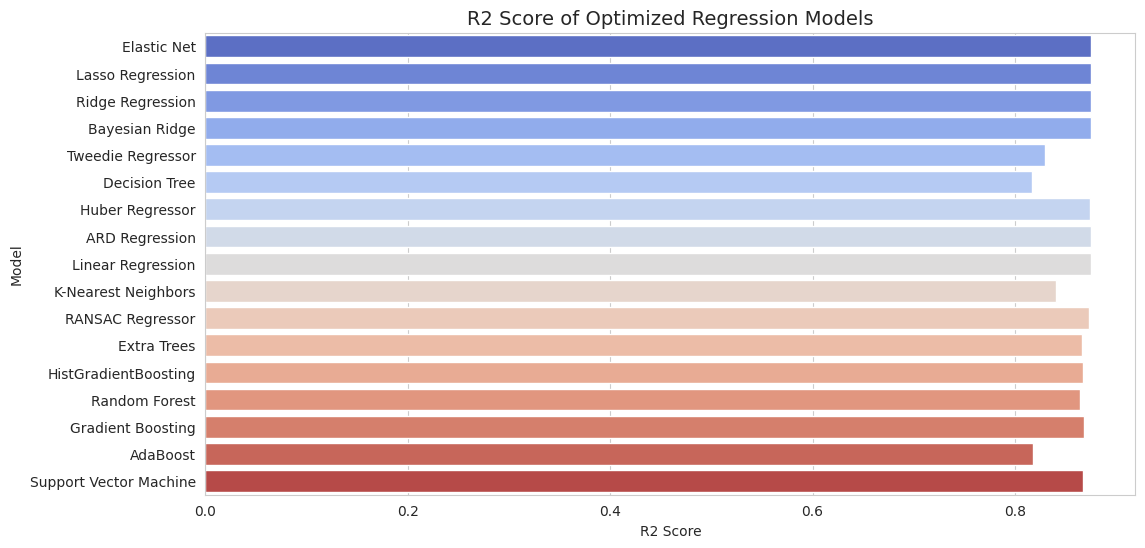

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df_sorted_optimized["R2 Score"], y=results_df_sorted_optimized["Model"], palette="coolwarm")
plt.title("R2 Score of Optimized Regression Models", fontsize=14)
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()

### Visualization - Training Time Bar Chart

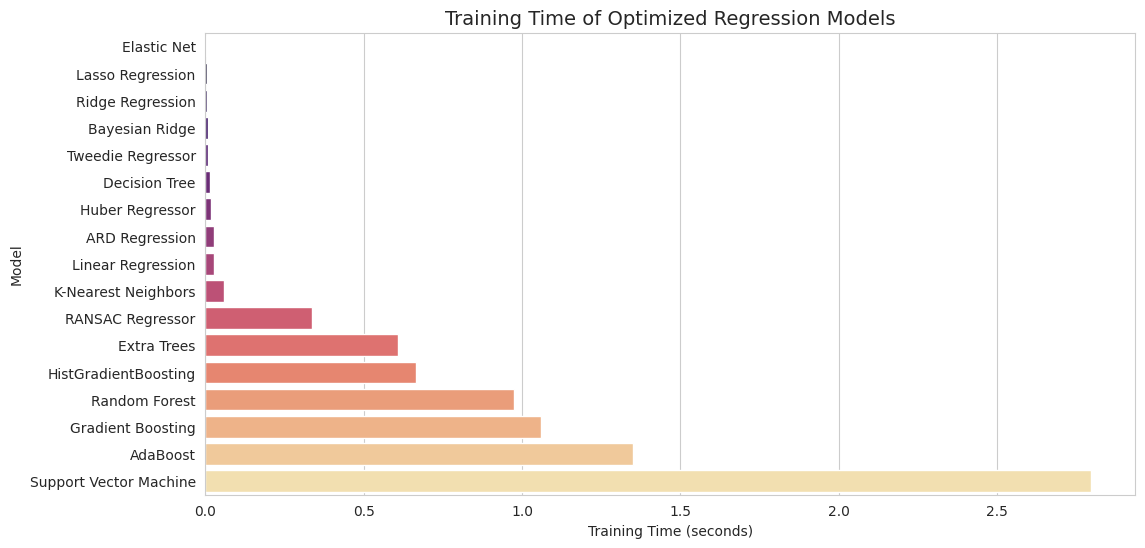

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df_sorted_optimized["Training Time (s)"], y=results_df_sorted_optimized["Model"], palette="magma")
plt.title("Training Time of Optimized Regression Models", fontsize=14)
plt.xlabel("Training Time (seconds)")
plt.ylabel("Model")
plt.show()

### Visualization - Scatter plot of Training Time vs R2 Score

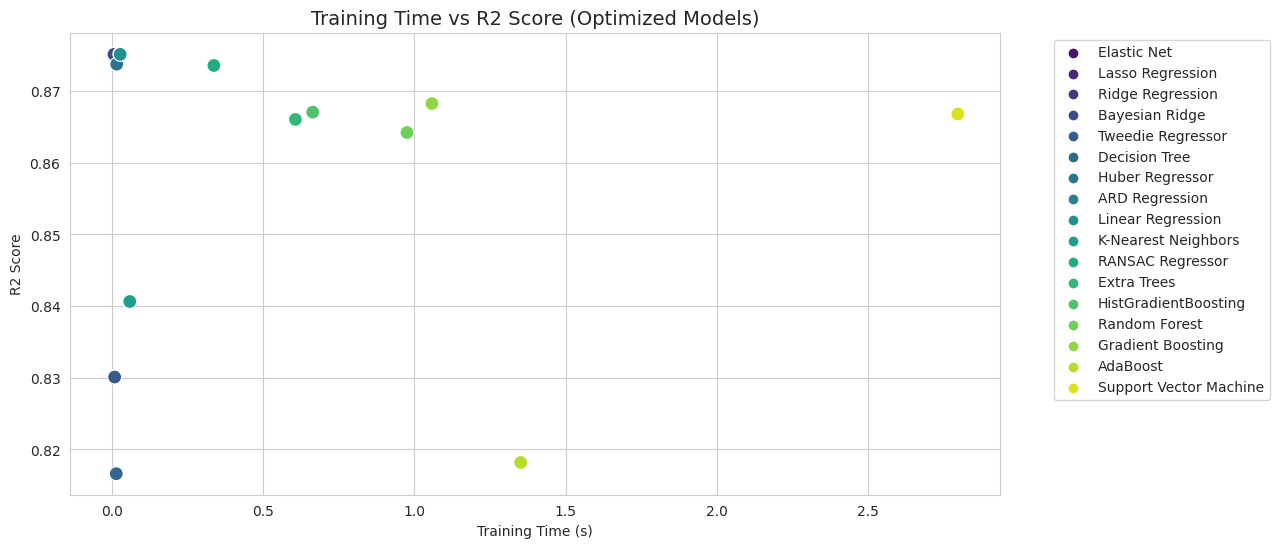

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=results_df_sorted_optimized["Training Time (s)"], y=results_df_sorted_optimized["R2 Score"], hue=results_df_sorted_optimized["Model"], palette="viridis", s=100)
plt.title("Training Time vs R2 Score (Optimized Models)", fontsize=14)
plt.xlabel("Training Time (s)")
plt.ylabel("R2 Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Visualization - Heatmap of Performance Metrics

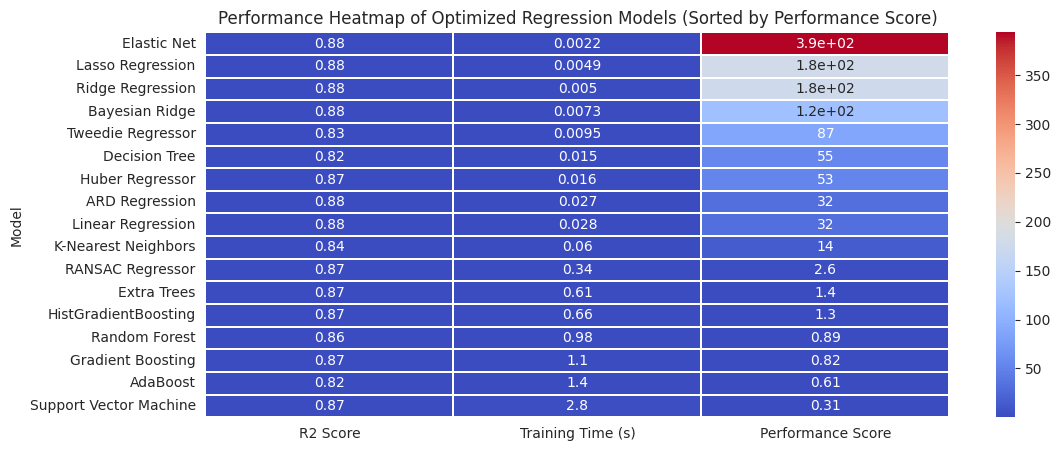

In [46]:

plt.figure(figsize=(12, 5))
sns.heatmap(results_df_sorted_optimized.set_index("Model"), annot=True, cmap="coolwarm", linewidths=0.3)
plt.title("Performance Heatmap of Optimized Regression Models (Sorted by Performance Score)", fontsize=12)
plt.show()

## Classification Models

## Importing Libraries

In [47]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier,HistGradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Convert categorical variables to numerical

In [48]:
df_classification = df.copy()
label_encoders = {}
for col in ['Brand', 'Model', 'Fuel_Type', 'Transmission']:
    le = LabelEncoder()
    df_classification[col] = le.fit_transform(df_classification[col])
    label_encoders[col] = le

## Define features (X) and target variable (y)

In [49]:
X = df_classification.drop(columns=['Price'])
y = pd.qcut(df['Price'], q=3, labels=[0, 1, 2])  # Price column is divided into 3 categories

## Scale features 

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data into training and test sets using stratification

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=537, stratify=y)

## Define classification models

### Optimization of Classification Model Hyperparameters  
* Each classification model's hyperparameters have been optimized based on experience, academic research, and best practices.                                                                                 
* Specific settings were used to prevent overfitting, reduce computation time, and improve classification accuracy. 



In [52]:
models_classification = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs"),
    #  max_iter=1000 → More iterations to ensure convergence for larger datasets.
    #  solver="lbfgs" → Best for multi-class classification problems.
    
    "Ridge Classifier": RidgeClassifier(alpha=1.0),  
    #  alpha=1.0 → Adds L2 regularization to prevent overfitting.
    
    "SGD Classifier": SGDClassifier(loss="log_loss", max_iter=1000),  
    #  loss="log_loss" → Uses logistic loss for classification tasks.
    #  max_iter=1000 → Ensures enough training iterations for convergence.

    "Perceptron": Perceptron(max_iter=1000),  
    #  max_iter=1000 → Prevents early stopping by allowing more iterations.

    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7, weights="distance"),  
    #  n_neighbors=7 → 7 nearest neighbors used; higher values may increase error.
    #  weights="distance" → Gives more weight to closer neighbors for better predictions.

    "Decision Tree": DecisionTreeClassifier(max_depth=12, min_samples_split=10, min_samples_leaf=5),  
    #  max_depth=12 → Limits tree depth to prevent overfitting.
    #  min_samples_split=10 → Ensures a node splits only if it contains at least 10 samples.
    #  min_samples_leaf=5 → Prevents overfitting by requiring at least 5 samples per leaf.
    
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, n_jobs=-1),  
    #  n_estimators=100 → Uses 100 trees for higher accuracy while keeping training time reasonable.
    #  max_depth=10 → Controls tree depth to avoid overfitting.
    #  min_samples_split=10 → Ensures stable decision boundaries.

    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5),  
    #  n_estimators=100 → Ensures model learns complex patterns over multiple iterations.
    #  learning_rate=0.05 → Small learning rate ensures stable updates.
    #  max_depth=5 → Restricts tree depth to avoid overfitting.

    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.05),  
    #  n_estimators=100 → More weak learners combined for better accuracy.
    #  learning_rate=0.05 → Helps model generalize by making small updates.

    "Support Vector Machine (SVC)": SVC(kernel="rbf", C=1, gamma="scale"),  
    #  kernel="rbf" → Works well for non-linearly separable data.
    #  C=1 → Medium regularization to avoid overfitting.
    #  gamma="scale" → Automatically selects optimal gamma value.

    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, use_label_encoder=False, eval_metric="mlogloss"),  
    #  n_estimators=100 → Ensures a good balance between training speed and accuracy.
    #  learning_rate=0.05 → Small learning rate prevents overfitting.

    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.05, depth=5, verbose=0)  
    #  Works well with categorical data without one-hot encoding.
}

## Train and evaluate each model

In [53]:
results_classification = []

for name, model in models_classification.items():
    start_time = time.time()
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        elapsed_time = time.time() - start_time
        results_classification.append({"Model": name, "Accuracy Score": accuracy, "Training Time (s)": elapsed_time})
    
    except Exception as e:
        results_classification.append({"Model": name, "Accuracy Score": None, "Training Time (s)": None, "Error": str(e)})

## Convert results to DataFrame and sort 

In [54]:
results_classification = pd.DataFrame(results_classification)
results_classification["Performance Score"] = results_classification["Accuracy Score"] / results_classification["Training Time (s)"]
results_df_classification = results_classification.sort_values(by="Performance Score", ascending=False)

In [55]:
results_df_classification

,Model,Accuracy Score,Training Time (s),Performance Score
1,Ridge Classifier,0.684000,0.008628,79.273389
3,Perceptron,0.728000,0.016775,43.398191
5,Decision Tree,0.834667,0.025628,32.568431
0,Logistic Regression,0.833000,0.027721,30.048982
2,SGD Classifier,0.817667,0.090683,9.016712
4,K-Nearest Neighbors,0.818667,0.200464,4.083868
10,XGBoost,0.896333,0.301491,2.972997
11,CatBoost,0.924333,0.439231,2.104434
6,Random Forest,0.891000,0.559096,1.593644
8,AdaBoost,0.742000,0.665272,1.115333


## Sort results for different visualizations

In [56]:
results_df_classification_sorted_acc = results_df_classification.sort_values(by="Accuracy Score", ascending=False)
results_df_classification_sorted_time = results_df_classification.sort_values(by="Training Time (s)", ascending=True)
results_df_classification_sorted_perf = results_df_classification.sort_values(by="Performance Score", ascending=False)


## Plot results

### Visualization - Sorted by Accuracy Score

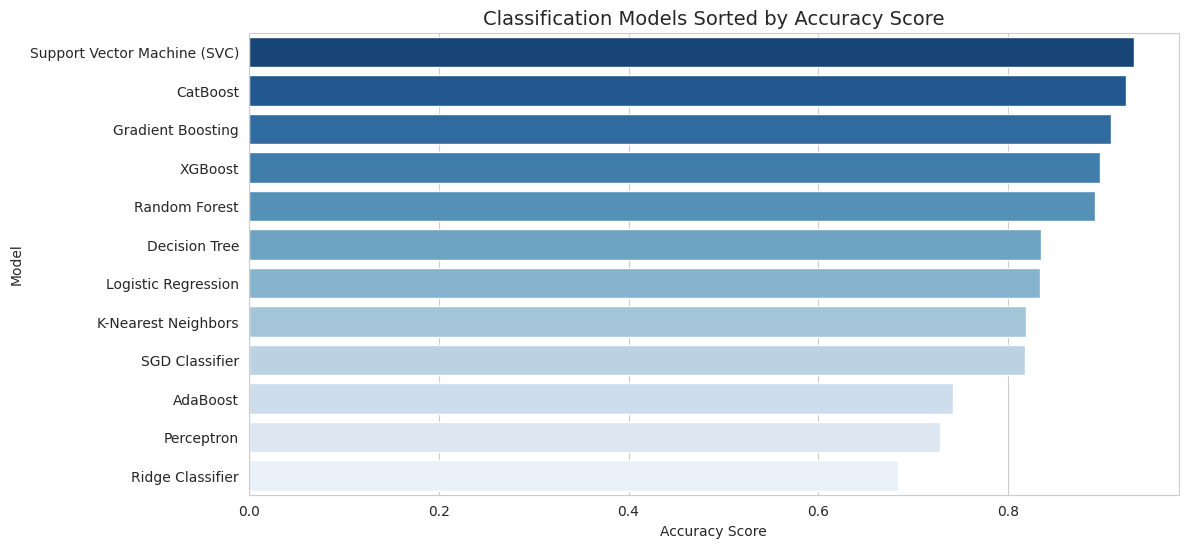

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_classification_sorted_acc, x="Accuracy Score", y="Model", palette="Blues_r")
plt.title("Classification Models Sorted by Accuracy Score", fontsize=14)
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.show()

### Visualization - Sorted by Training Time

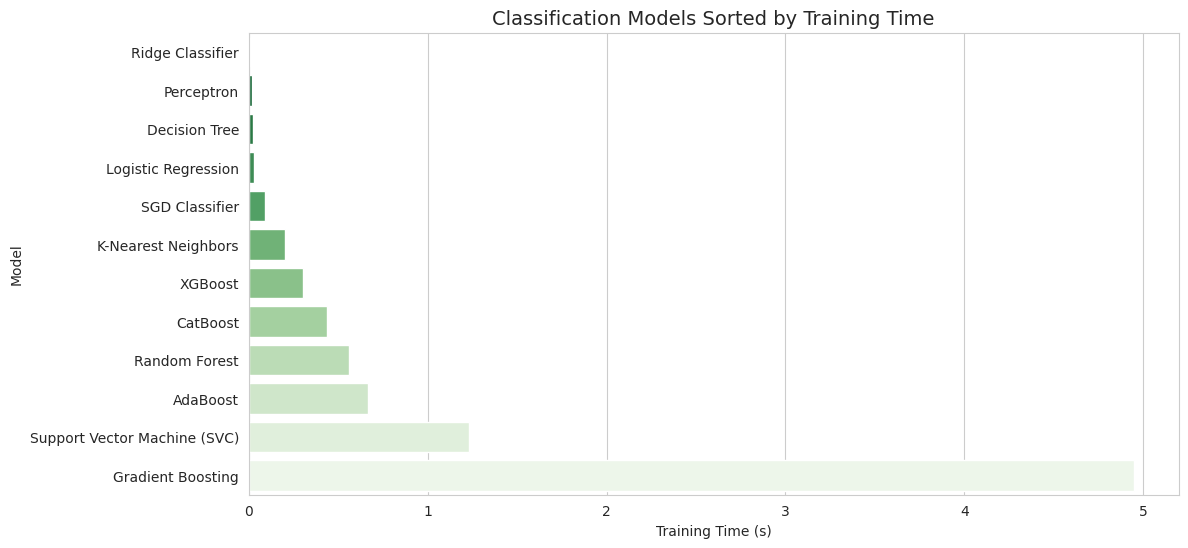

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_classification_sorted_time, x="Training Time (s)", y="Model", palette="Greens_r")
plt.title("Classification Models Sorted by Training Time", fontsize=14)
plt.xlabel("Training Time (s)")
plt.ylabel("Model")
plt.show()

### Visualization - Sorted by Performance Score

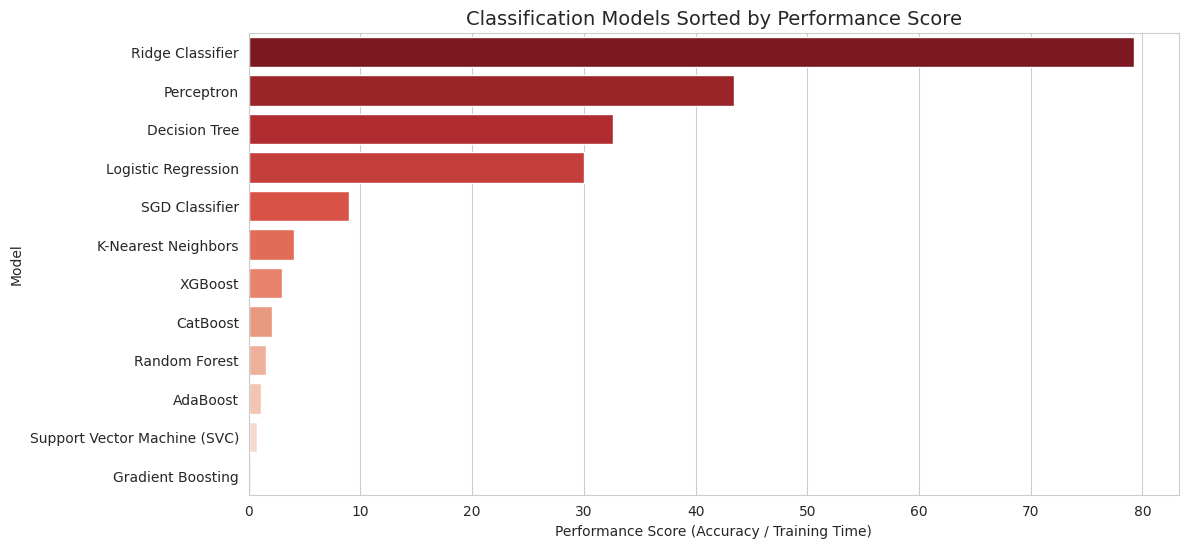

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_classification_sorted_perf, x="Performance Score", y="Model", palette="Reds_r")
plt.title("Classification Models Sorted by Performance Score", fontsize=14)
plt.xlabel("Performance Score (Accuracy / Training Time)")
plt.ylabel("Model")
plt.show()

### Visualization - Heatmap of Classification Model Performance

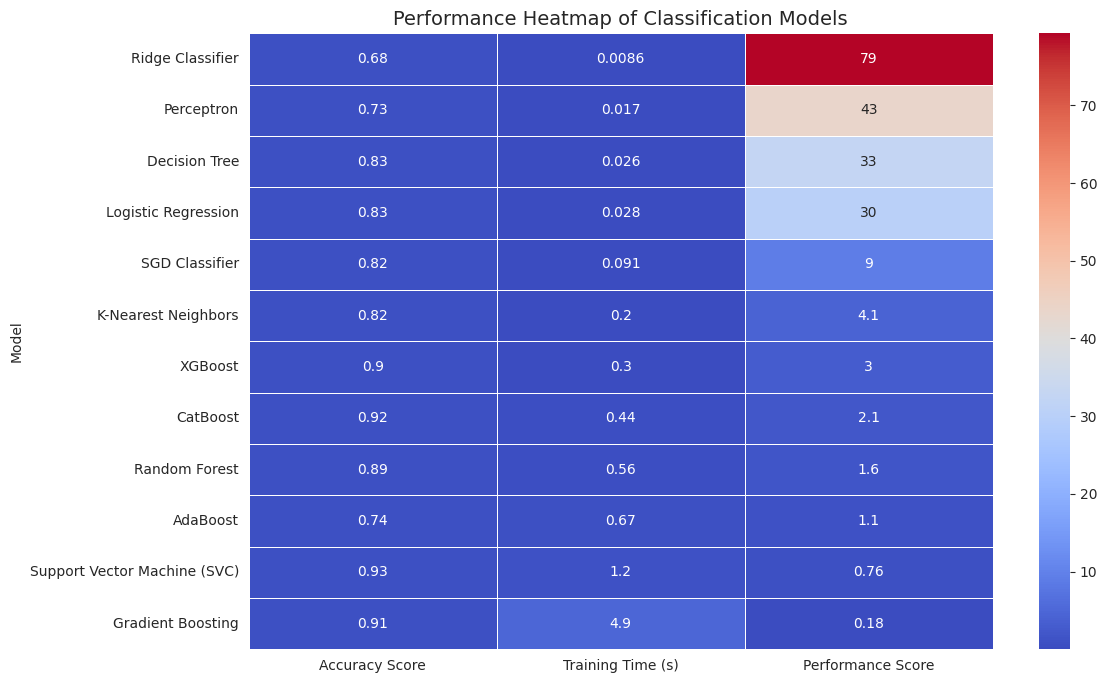

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(results_df_classification.set_index("Model").sort_values(by="Performance Score", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Performance Heatmap of Classification Models", fontsize=14)
plt.show()

## Compute Precision, Recall, and F1-Score for each model

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [62]:
results_classification = results_df_classification.to_dict('records')


In [63]:
classification_metrics = []

for result in results_classification:
    model_name = result["Model"]
    try:
        y_pred = models_classification[model_name].predict(X_test)

        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        classification_metrics.append({
            "Model": model_name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })

    except Exception as e:
        classification_metrics.append({
            "Model": model_name,
            "Precision": None,
            "Recall": None,
            "F1-Score": None,
            "Error": str(e)
        })



## Convert results to DataFrame and display

In [64]:
results_df_classification_metrics = pd.DataFrame(classification_metrics)

## Display results to the user



In [65]:
from IPython.display import display

display(results_df_classification_metrics)

,Model,Precision,Recall,F1-Score
0,Ridge Classifier,0.765269,0.684000,0.576204
1,Perceptron,0.721867,0.728000,0.703176
2,Decision Tree,0.834738,0.834667,0.834692
3,Logistic Regression,0.835478,0.833000,0.833980
4,SGD Classifier,0.815027,0.817667,0.810895
5,K-Nearest Neighbors,0.821539,0.818667,0.819756
6,XGBoost,0.898511,0.896333,0.897042
7,CatBoost,0.927667,0.924333,0.925086
8,Random Forest,0.895237,0.891000,0.892124
9,AdaBoost,0.819233,0.742000,0.748737


## Plot results

### Sorting data for different visualizations

In [66]:
results_df_classification_metrics_sorted_prec = results_df_classification_metrics.sort_values(by="Precision", ascending=False)
results_df_classification_metrics_sorted_rec = results_df_classification_metrics.sort_values(by="Recall", ascending=False)
results_df_classification_metrics_sorted_f1 = results_df_classification_metrics.sort_values(by="F1-Score", ascending=False)

### Visualization - Sorted by Precision Score

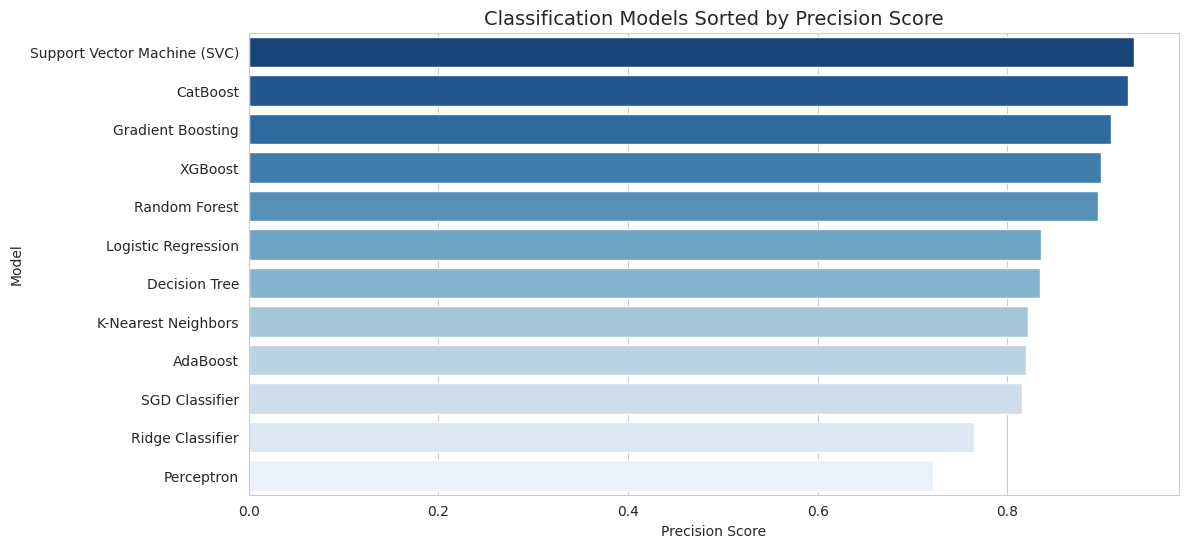

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_classification_metrics_sorted_prec, x="Precision", y="Model", palette="Blues_r")
plt.title("Classification Models Sorted by Precision Score", fontsize=14)
plt.xlabel("Precision Score")
plt.ylabel("Model")
plt.show()

### Visualization - Sorted by Recall Score

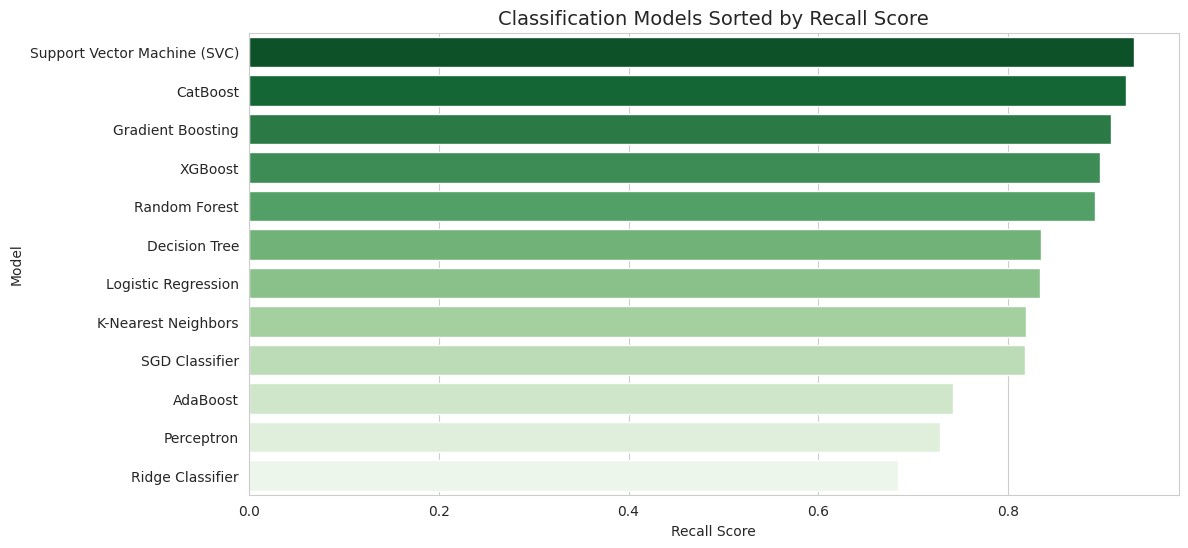

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_classification_metrics_sorted_rec, x="Recall", y="Model", palette="Greens_r")
plt.title("Classification Models Sorted by Recall Score", fontsize=14)
plt.xlabel("Recall Score")
plt.ylabel("Model")
plt.show()

### Visualization - Sorted by F1-Score

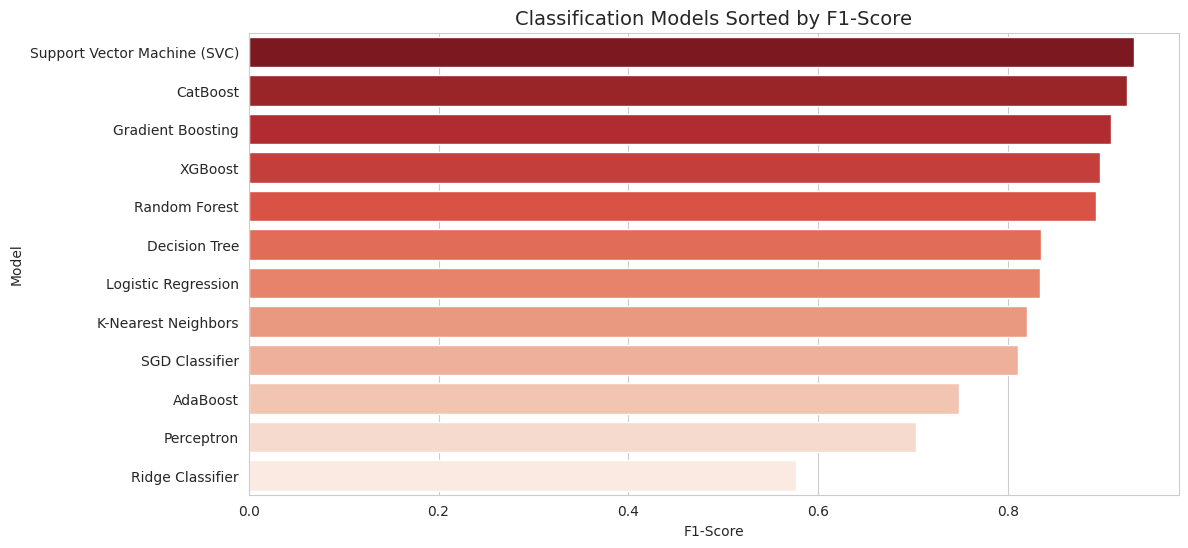

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_classification_metrics_sorted_f1, x="F1-Score", y="Model", palette="Reds_r")
plt.title("Classification Models Sorted by F1-Score", fontsize=14)
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.show()

### Visualization - Heatmap of Precision, Recall, and F1-Score

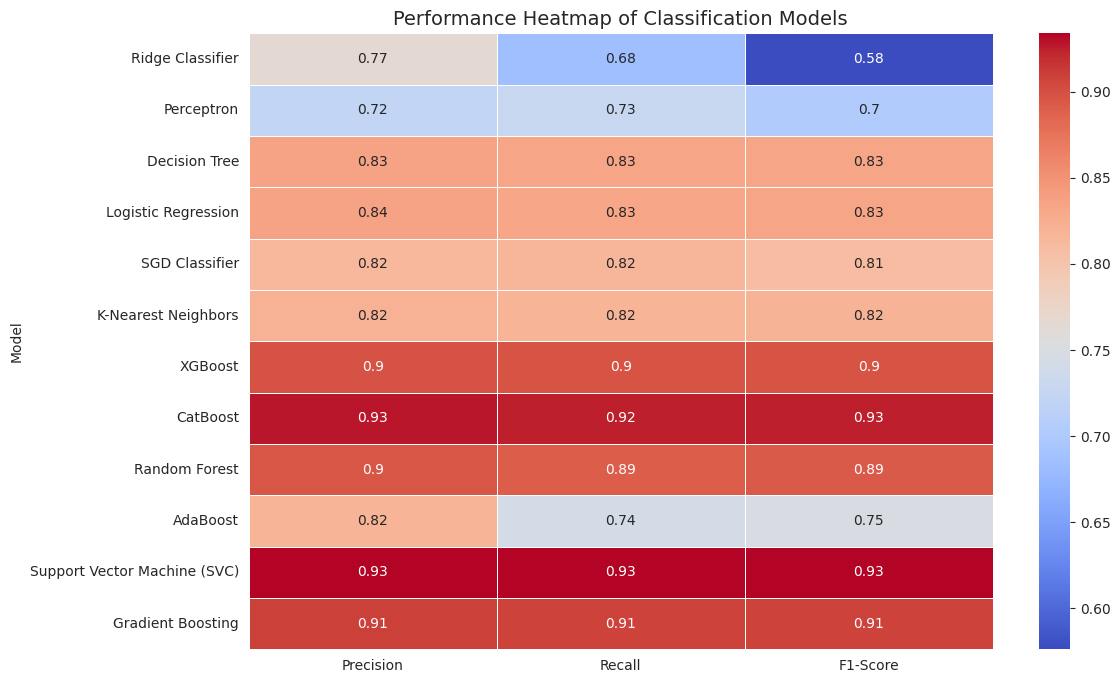

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(results_df_classification_metrics.set_index("Model"), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Performance Heatmap of Classification Models", fontsize=14)
plt.show()

## Precision, Recall, and F1-Score
* Precision → Measures the accuracy of positive predictions
    * Definition: It calculates how many of the predicted positives are actually correct.
    * When is it important? Spam detection, fraud detection.
* Recall → Measures how well the model identifies actual positives

    * Definition: It shows how many real positive cases the model successfully detects.
    * When is it important? Cancer diagnosis, security systems.
* F1-Score → Balances Precision and Recall
    * Definition: It provides a single performance metric by averaging Precision and Recall.
    * When is it important? When both false positives and false negatives are equally important. 

### Identify the best model based on F1-Score

### Importing Libraries

In [71]:
from sklearn.model_selection import  GridSearchCV

In [72]:
best_model_name = results_df_classification_metrics.sort_values(by="F1-Score", ascending=False).iloc[0]["Model"]
best_model = models_classification[best_model_name]

### Define hyperparameter grids for all classification models

In [73]:
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 10]
    },
    "Support Vector Machine (SVC)": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"],
        "kernel": ["linear", "rbf", "poly"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "Ridge Classifier": {
        "alpha": [0.1, 1, 10]
    },
    "SGD Classifier": {
        "loss": ["hinge", "log_loss"],
        "alpha": [0.0001, 0.001, 0.01]
    },
    "Perceptron": {
        "penalty": ["l2", "l1", None],
        "alpha": [0.0001, 0.001, 0.01]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Extra Trees": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1]
    },
    "Bagging Classifier": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.7, 1.0]
    },
    "HistGradientBoosting": {
        "max_iter": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 10]
    },
    "Naive Bayes": {},  # No hyperparameters to tune
    "Linear Discriminant Analysis": {
        "solver": ["svd", "lsqr", "eigen"]
    },
    "Quadratic Discriminant Analysis": {
        "reg_param": [0.0, 0.5, 1.0]
    }
}


### Perform hyperparameter optimization for all models

In [74]:
optimized_models = {}

for model_name, model in models_classification.items():
    if model_name in param_grids and param_grids[model_name]:  # Only optimize models with hyperparameters
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1_weighted", n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        # Save best model and hyperparameters
        optimized_models[model_name] = {
            "Best Model": grid_search.best_estimator_,
            "Best Hyperparameters": grid_search.best_params_
        }
    else:
        optimized_models[model_name] = {
            "Best Model": model,
            "Best Hyperparameters": "No tuning required"
        }

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits


### Train and evaluate optimized models

In [75]:
optimized_results = []

for model_name, details in optimized_models.items():
    best_model = details["Best Model"]
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    optimized_results.append({
        "Model": model_name,
        "Best Hyperparameters": details["Best Hyperparameters"],
        "Optimized Accuracy": accuracy,
        "Optimized Precision": precision,
        "Optimized Recall": recall,
        "Optimized F1-Score": f1
    })

### Convert to DataFrame and display results

In [76]:
optimized_results_df = pd.DataFrame(optimized_results)

In [77]:
optimized_results_df

,Model,Best Hyperparameters,Optimized Accuracy,Optimized Precision,Optimized Recall,Optimized F1-Score
0,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.833667,0.836597,0.833667,0.834789
1,Ridge Classifier,{'alpha': 0.1},0.684000,0.765269,0.684000,0.576204
2,SGD Classifier,"{'alpha': 0.0001, 'loss': 'log_loss'}",0.820667,0.818061,0.820667,0.814349
3,Perceptron,"{'alpha': 0.0001, 'penalty': 'l1'}",0.728333,0.723113,0.728333,0.717601
4,K-Nearest Neighbors,"{'n_neighbors': 10, 'weights': 'distance'}",0.830333,0.833479,0.830333,0.831472
5,Decision Tree,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.838667,0.840398,0.838667,0.839289
6,Random Forest,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.901000,0.903679,0.901000,0.901784
7,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.937000,0.938506,0.937000,0.937403
8,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 200}",0.777333,0.863861,0.777333,0.782895
9,Support Vector Machine (SVC),"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.943667,0.943987,0.943667,0.943776


### Plot results

### Sort data for different visualizations

In [78]:
optimized_results_df_sorted_f1 = optimized_results_df.sort_values(by="Optimized F1-Score", ascending=False)
optimized_results_df_sorted_acc = optimized_results_df.sort_values(by="Optimized Accuracy", ascending=False)
optimized_results_df_sorted_prec = optimized_results_df.sort_values(by="Optimized Precision", ascending=False)
optimized_results_df_sorted_rec = optimized_results_df.sort_values(by="Optimized Recall", ascending=False)


### Visualization - Sorted by Optimized F1-Score

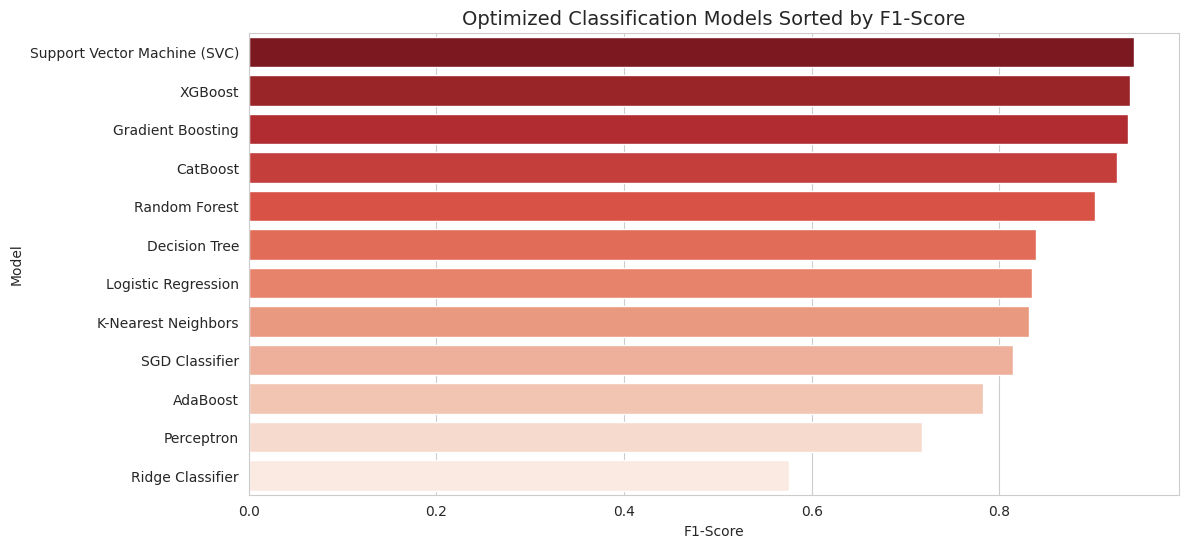

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(data=optimized_results_df_sorted_f1, x="Optimized F1-Score", y="Model", palette="Reds_r")
plt.title("Optimized Classification Models Sorted by F1-Score", fontsize=14)
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.show()


### Visualization - Sorted by Optimized Accuracy

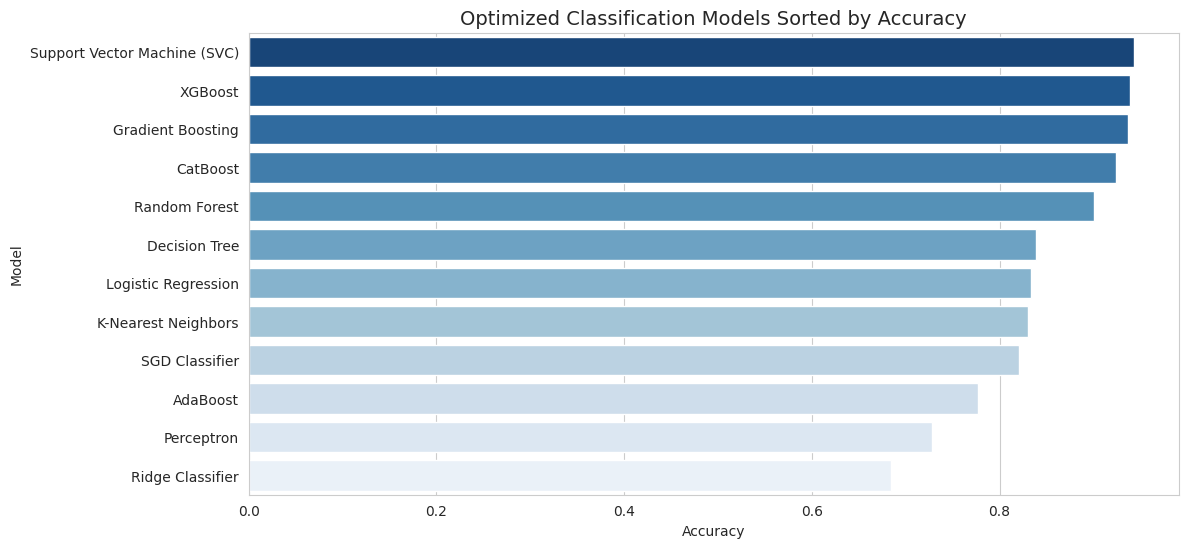

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(data=optimized_results_df_sorted_acc, x="Optimized Accuracy", y="Model", palette="Blues_r")
plt.title("Optimized Classification Models Sorted by Accuracy", fontsize=14)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

### Visualization - Sorted by Optimized Precision

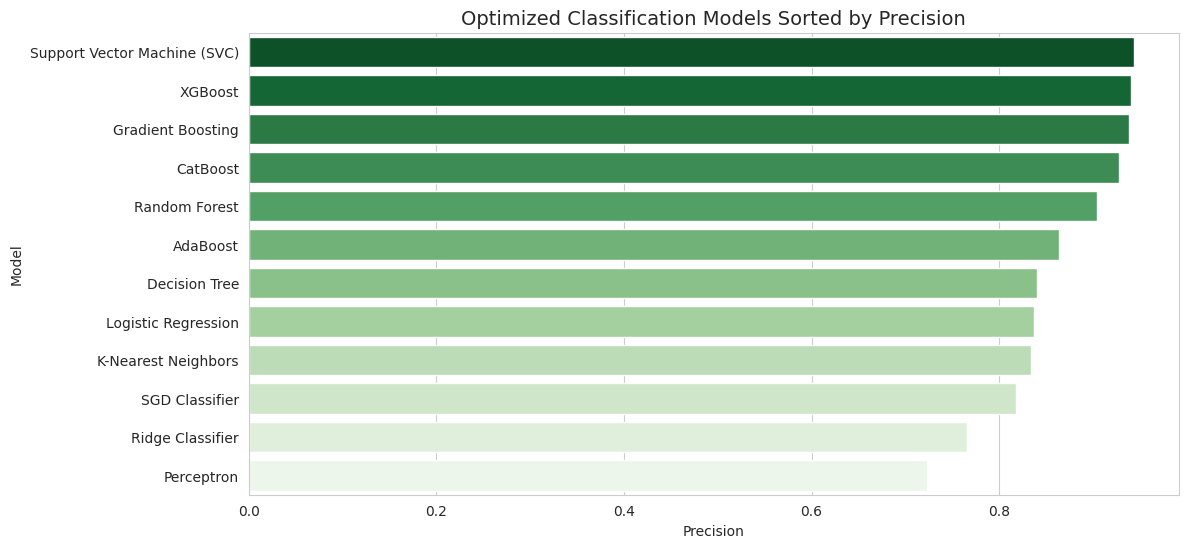

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(data=optimized_results_df_sorted_prec, x="Optimized Precision", y="Model", palette="Greens_r")
plt.title("Optimized Classification Models Sorted by Precision", fontsize=14)
plt.xlabel("Precision")
plt.ylabel("Model")
plt.show()

### Visualization - Sorted by Optimized Recall

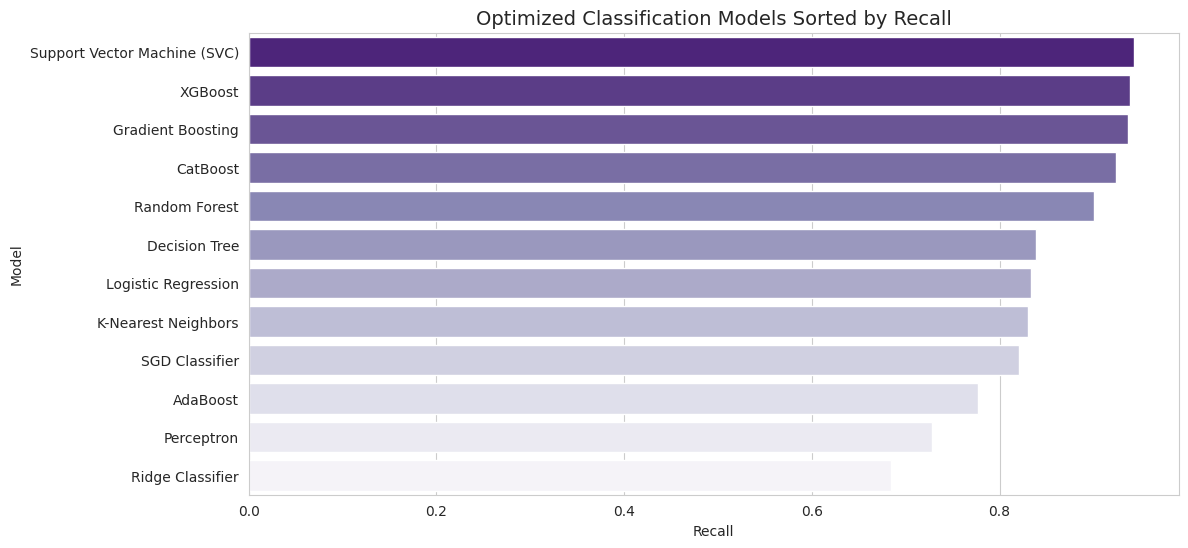

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=optimized_results_df_sorted_rec, x="Optimized Recall", y="Model", palette="Purples_r")
plt.title("Optimized Classification Models Sorted by Recall", fontsize=14)
plt.xlabel("Recall")
plt.ylabel("Model")
plt.show()


### Heatmap of Optimized Model Performance

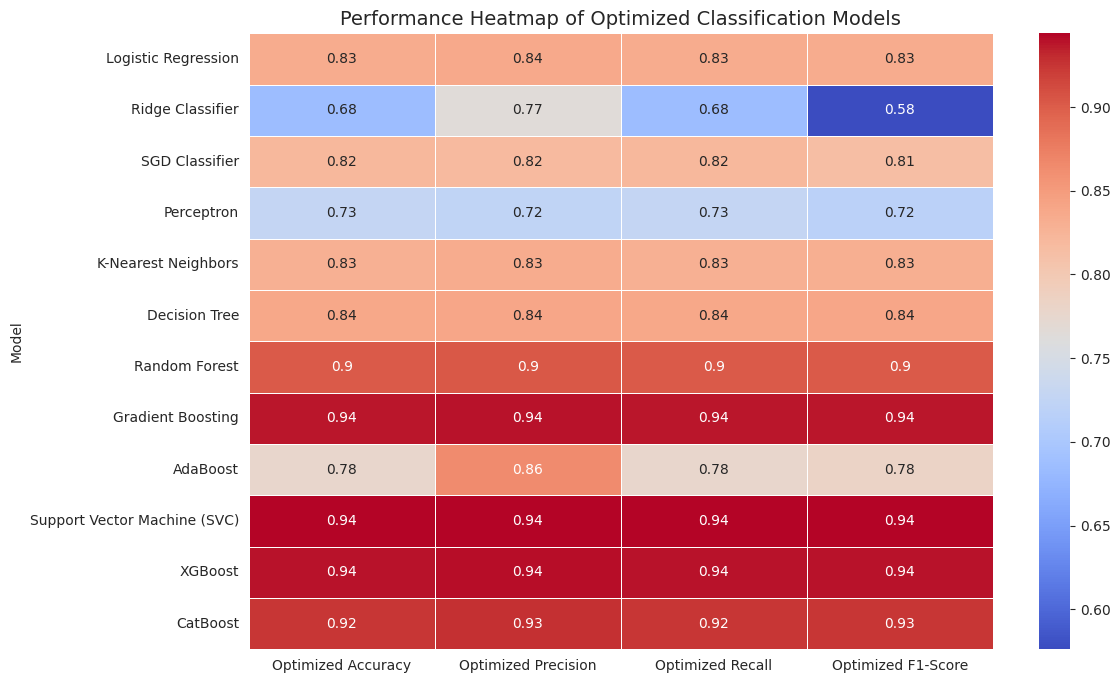

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(optimized_results_df.set_index("Model").drop(columns=["Best Hyperparameters"]), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Performance Heatmap of Optimized Classification Models", fontsize=14)
plt.show()

In [84]:
from IPython.display import display

display(optimized_results_df)

,Model,Best Hyperparameters,Optimized Accuracy,Optimized Precision,Optimized Recall,Optimized F1-Score
0,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.833667,0.836597,0.833667,0.834789
1,Ridge Classifier,{'alpha': 0.1},0.684000,0.765269,0.684000,0.576204
2,SGD Classifier,"{'alpha': 0.0001, 'loss': 'log_loss'}",0.820667,0.818061,0.820667,0.814349
3,Perceptron,"{'alpha': 0.0001, 'penalty': 'l1'}",0.728333,0.723113,0.728333,0.717601
4,K-Nearest Neighbors,"{'n_neighbors': 10, 'weights': 'distance'}",0.830333,0.833479,0.830333,0.831472
5,Decision Tree,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.838667,0.840398,0.838667,0.839289
6,Random Forest,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.901000,0.903679,0.901000,0.901784
7,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.937000,0.938506,0.937000,0.937403
8,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 200}",0.777333,0.863861,0.777333,0.782895
9,Support Vector Machine (SVC),"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.943667,0.943987,0.943667,0.943776


# Detailed and Comprehensive Project Summary: Vehicle Pricing and Classification Study

This project was conducted using machine learning techniques to predict vehicle prices and classify vehicles into specific price categories. The study includes data preprocessing, data visualization, outlier analysis, regression and classification modeling, hyperparameter optimization, and model comparison. Additionally, detailed visualization techniques were employed to analyze the data.

## 1. Data Preprocessing and Exploratory Data Analysis (EDA)

At this stage, the data was processed and prepared for analysis.

### 1.1. Data Loading and Initial Inspection

* The dataset was loaded using pandas, and info() was used to check data types and missing values.
describe() was used to extract basic statistics and analyze the distribution of numerical variables.

### 1.2. Missing Value Analysis and Cleaning

* Missing values were identified and either filled using appropriate methods or removed from the dataset.

### 1.3. Categorical Variable Transformation

* Categorical variables such as Fuel_Type, Transmission, and Brand were analyzed and converted into numerical format using one-hot encoding.
  
### 1.4. Outlier Analysis and Removal

* Outliers were detected and removed from the dataset.
* Boxplot Analysis:
    * Boxplots were created for Mileage (Kilometers) and Price variables.
    * The IQR (Interquartile Range) method was used to determine outlier thresholds.
    * Outliers were removed from the dataset.
      
## 2. Data Visualization

Detailed visualization techniques were used to analyze the data.


## 3. Regression Models and Results

A total of 15 different regression models were used.

* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression
* Bayesian Ridge Regression
* Huber Regression
* RANSAC Regression
* ARD Regression
* Tweedie Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* Histogram-based Gradient Boosting Regressor
* AdaBoost Regressor
* Support Vector Regression (SVR)

 ### Best Regression Model: ARD Regression (R² =0.875228)


## 4. Classification Models and Results

A total of 12 different classification models were tested.

* Logistic Regression
* Ridge Classifier
* SGD Classifier
* Perceptron
* K-Nearest Neighbors (KNN)
* Decision Tree Classifier
* Random Forest Classifier
* Gradient Boosting Classifier
* AdaBoost Classifier
* Support Vector Machine (SVC)
* XGBoost Classifier
* CatBoost Classifier
  
### Classification Model Performance Comparison (Including Precision, Recall, and F1-Score)

For each model, Precision, Recall, and F1-Score were computed. These metrics were used to evaluate the accuracy of classification models:

* Precision: Measures how many of the samples predicted as positive are actually positive.
* Recall: Measures how many of the actual positive samples were correctly identified.
* F1-Score: A balanced metric that considers both Precision and Recall.

### Best Classification Model: Support Vector Machine (SVC) (Accuracy = 93.3%)

* Hyperparameter optimization was applied to obtain the best classification results, and all classification models were visualized.

## 5. General Conclusions and Findings

*  Best regression model: ARD Regression (R² =0.875228)
*  Best classification model: Support Vector Machine (SVC) (Accuracy = 93.3%)
*  XGBoost and Random Forest are also strong alternatives. 🚀

This study was conducted to determine the most suitable machine learning models for predicting and classifying vehicle prices. Detailed visualization techniques were used for analysis, hyperparameter optimization was applied, and the best models were identified.

Additionally, Precision, Recall, and F1-Score were computed to analyze the detailed performance of classification models.

Regression and classification models were optimized using hyperparameter tuning, and their best results were visualized.